<a href="https://colab.research.google.com/github/arifanwar0243/colabs/blob/main/Bycycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIMULASI KINEMATIC BICYCLE ROBOT (Indrazno Siradjuddin)

#Bicylce (Front Wheel Drive)

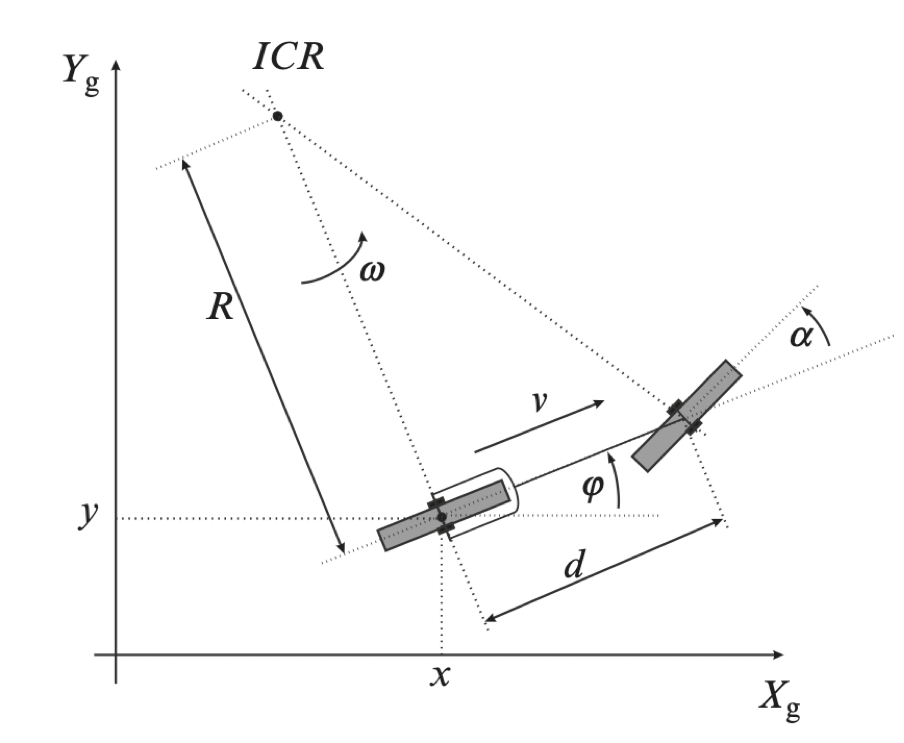

It has a steering wheel where $\alpha$ is the steering angle and $\omega_s$ is wheel angular velocity around its axis (front-wheel drive). The ICR point is defined by the intersection of both wheel axes. In each moment of time the bicycle circles around ICR with angular velocity $\omega$, radius $R$, and distance between the wheels $d$

$$
\begin{eqnarray}
R(t) &=& d \tan \left( \dfrac{\pi}{2} - \alpha(t) \right) \\
&=& \dfrac{d}{\tan (\alpha(t))}
\end{eqnarray}
$$

The steering wheel circles around ICR with $\omega$ so we can write
$$
\begin{eqnarray}
\omega(t) = \dot{\varphi} &=& \dfrac{v_s(t)}{\sqrt{d^2 + R^2}} \\
&=& \dfrac{v_s(t)}{\sqrt{d^2 + \dfrac{d^2}{\tan^2 (\alpha(t))} }} \\
&=& \dfrac{v_s(t)}{d \left(\sqrt{1 + \dfrac{1}{\tan^2 (\alpha(t))}} \right)} \\
&=& \dfrac{v_s(t)}{d \left(\sqrt{\dfrac{\sin^2(\alpha(t))+\cos^2(\alpha(t))}{\sin^2 (\alpha(t))}} \right)} \\
&=& \dfrac{v_s(t)}{d} \sin (\alpha(t))
\end{eqnarray}
$$

In [1]:
import numpy as np

print(np.tan(np.pi/2 - np.radians(30)))
print(1/np.tan(np.radians(30)))

import sympy as sp
a = sp.Symbol('a')

sp.simplify(sp.sqrt(1+1/(sp.tan(a)**2)))

1.7320508075688776
1.7320508075688774


sqrt(sin(a)**(-2))

where $v_s(t) = \omega_s(t) r$ and $r$ are the rim velocity and the radius of the front wheel, respectively. The kinematic is described as

$$
\dot{x} = v_s(t) \cos(\alpha(t)) \cos(\varphi(t)) \\
\dot{y} = v_s(t) \cos(\alpha(t)) \sin(\varphi(t)) \\
\dot{\varphi}= \dfrac{v_s(t)}{d}\sin(\alpha(t))
$$

In matrix form
$$
\begin{pmatrix}
\dot{x} \\
\dot{y} \\
\dot{\varphi}
\end{pmatrix}
=
\begin{pmatrix}
\cos(\varphi(t)) & 0 \\
\sin(\varphi(t)) & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
v(t)\\
\omega(t)
\end{pmatrix}
$$

$$
\dot{\mathbf{X}} = \mathbf{J}\dot{\mathbf{q}}
$$
where $v = v_s(t) \cos (\alpha(t))$ and $\omega(t) = \dfrac{v_s(t)}{d} \sin (\alpha(t))$.

#Bicylce (Rear Wheel Drive)

Usually vehicles are powered by the rear wheels and steered by the front wheel (e.g., bicycle, tricycles, and some cars). The control variables in this case are rear velocity $v_r(t)$ and steering angle of the front wheel $\alpha(t)$.

$v = v_r = v_s(t) \cos (\alpha(t))$

Thus the kinematic is

$$
\begin{eqnarray}
\dot{x} &=& v_r(t) \cos(\varphi(t)) \\
\dot{y} &=& v_r(t)  \sin(\varphi(t)) \\
\dot{\varphi} &=& \dfrac{v_s(t)}{d}\sin(\alpha(t)) \\
&=& \dfrac{v_r(t)}{d \cos(\alpha(t))}\sin(\alpha(t)) \\
&=& \dfrac{v_r(t)}{d} \tan(\alpha(t))
\end{eqnarray}
$$

and $\omega(t) = \dot{\varphi} = \dfrac{v_r(t)}{d} \tan (\alpha(t))$.

In matrix form
$$
\begin{pmatrix}
\dot{x} \\
\dot{y} \\
\dot{\varphi}
\end{pmatrix}
=
\begin{pmatrix}
\cos(\varphi(t)) & 0 \\
\sin(\varphi(t)) & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
v_r(t)\\
\omega(t)
\end{pmatrix}
$$


$$
\dot{\mathbf{X}} = \mathbf{J}\dot{\mathbf{q}}
$$


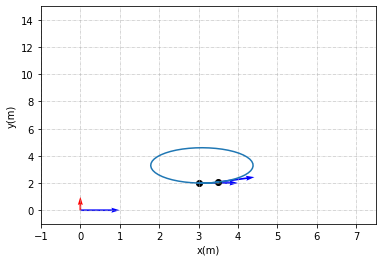

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def rotation(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return R

def objectdrawing(o, d, R):
  i = np.array([1,0])
  ii = R @ i 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.scatter(oo[0], oo[1], color='k')

def framedrawing(o, d, R):
  i = np.array([1,0])
  j = np.array([0,1])
  ii = R @ i 
  jj = R @ j 
  oo = o + d
  plt.quiver(*oo, *ii, scale=1, color='b', scale_units='xy', angles = 'xy', width=0.005)
  plt.quiver(*oo, *jj, scale=1, color='g', scale_units='xy', angles = 'xy', width=0.005)


#frame reference
R0 = rotation(0)
framedrawing(np.array([0,0]), np.array([0,0]), R0)

#pose awal
p = np.array([3.,2.])
varphi = np.radians(0) 
X = np.array([p[0], p[1], varphi])
R = rotation(varphi)
o = np.array([0,0])

#plot object pose awal
objectdrawing(o, p, R)

ts = 0.1
t = np.arange(0, 5, ts)
d = 0.75

px = [p[0]]
py = [p[1]]
varphi_log= [varphi]
alpha = np.radians(30)
vs = 2. # m/s
alpha_dot = 0. #rad/s


for i in range(len(t)):
  x_dot = vs * np.cos(alpha) * np.cos(X[2])
  y_dot = vs * np.cos(alpha) * np.sin(X[2])
  omega = vs/d * np.sin(alpha)
  Xi = np.array([x_dot, y_dot, omega])
  X = X + ts * Xi
  px.append(X[0])
  py.append(X[1])
  varphi_log.append(X[2])
  alpha = alpha + alpha_dot * ts


#plot object pose akhir
varphi = X[2]
R = rotation(varphi)
p[0] = X[0]
p[1] = X[1]
objectdrawing(o, p, R)

#plot trajectory
plt.plot(px, py)

plt.axis([ -1 , 7.5 , -1 ,15])
plt.grid(linestyle='-.', linewidth=0.5)
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.show()